In [25]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import pandas as pd
import numpy as np
from numpy import pi
from qiskit import Aer, execute

In [17]:
# Get the data from the .csv file
df = pd.read_csv('kmeans_data.csv',
    usecols=['Feature 1', 'Feature 2', 'Class'])
# Change categorical data to number 0-2
df["Class"] = pd.Categorical(df["Class"])
df["Class"] = df["Class"].cat.codes
# Change dataframe to numpy matrix
data = df.values[:, 0:2]
category = df.values[:, 2]

c = data.shape[1]

In [18]:
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

In [19]:
def encode_feature(x):
    """"
    We map data feature values to \theta and \phi values using this equation:
        \phi = (x + 1) \frac{\pi}{2},
    where \phi is the phase and \theta the angle
    """
    return ((x + 1) * pi / 2)

In [29]:

centroids = np.array([[-0.25, 0.2], [0, -0.1], [0.25, 0.35]])




k = len(centroids)
#x_point, y_point = point[0], point[1]
x_point, y_point = -0.161,0.141
    
# Calculating theta and phi values
phi_list = [encode_feature(x) for x in [centroids[0][0], centroids[1][0], centroids[2][0]]]
theta_list = [encode_feature(x) for x in [centroids[0][1], centroids[1][1], centroids[2][1]]]
phi_input = encode_feature(x_point)
theta_input = encode_feature(y_point)


# We need 3 quantum registers, of size k one for a data point (input),
# one for each centroid and one for each ancillary
qreg_input = QuantumRegister(k, name='qreg_input')
qreg_centroid = QuantumRegister(k, name='qreg_centroid')
qreg_psi = QuantumRegister(k, name='qreg_psi')


# Create a one bit ClassicalRegister to hold the result
# of the measurements
creg = ClassicalRegister(k, 'creg')

# Create the quantum circuit containing our registers
qc = QuantumCircuit(qreg_input, qreg_centroid, qreg_psi, creg, name='qc')

backend = Aer.get_backend('qasm_simulator')

    # Encode the point to measure and centroid
for i in range(k):
    qc.u3(theta_list[i], phi_list[i], 0, qreg_centroid[i])
    qc.u3(theta_input, phi_input, 0, qreg_input[i]) 

for i in range(k):
    # Apply a Hadamard to the ancillaries
    qc.h(qreg_psi[i])

    # Perform controlled swap
    qc.cswap(qreg_psi[i], qreg_input[i], qreg_centroid[i]) 

        # Apply second Hadamard to ancillary
    qc.h(qreg_psi[i])

        # Measure ancillary
    qc.measure(qreg_psi[i], creg[i])
        


In [30]:
print(qc)


                    ┌─────────────────────┐                       
   qreg_input_0: |0>┤ U3(1.7923,1.3179,0) ├─X─────────────────────
                    ├─────────────────────┤ │                     
   qreg_input_1: |0>┤ U3(1.7923,1.3179,0) ├─┼──X──────────────────
                    ├─────────────────────┤ │  │                  
   qreg_input_2: |0>┤ U3(1.7923,1.3179,0) ├─┼──┼──X───────────────
                    └┬────────────────────┤ │  │  │               
qreg_centroid_0: |0>─┤ U3(1.885,1.1781,0) ├─X──┼──┼───────────────
                    ┌┴────────────────────┤ │  │  │               
qreg_centroid_1: |0>┤ U3(1.4137,1.5708,0) ├─┼──X──┼───────────────
                    ├─────────────────────┤ │  │  │               
qreg_centroid_2: |0>┤ U3(2.1206,1.9635,0) ├─┼──┼──X───────────────
                    └────────┬───┬────────┘ │  │  │ ┌───┐┌─┐      
     qreg_psi_0: |0>─────────┤ H ├──────────■──┼──┼─┤ H ├┤M├──────
                             ├───┤             │  │ ├───┤└╥┘┌─

In [31]:
qc.draw()

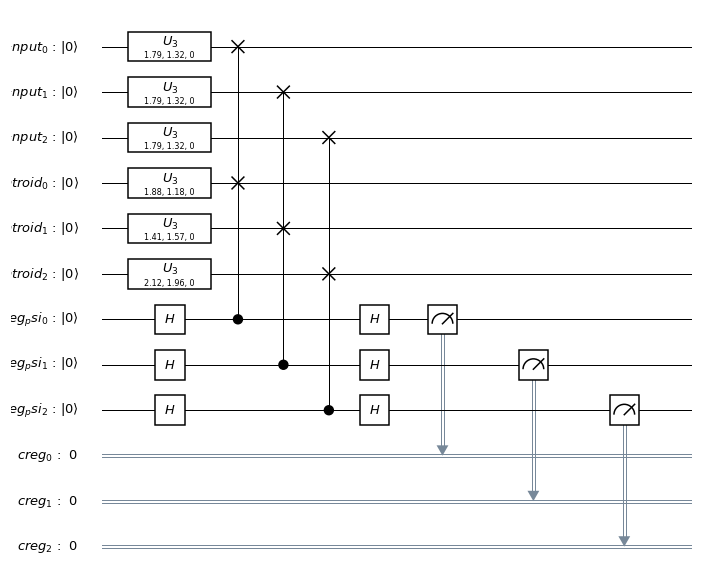

In [33]:
# Matplotlib Drawing
qc.draw(output='mpl')


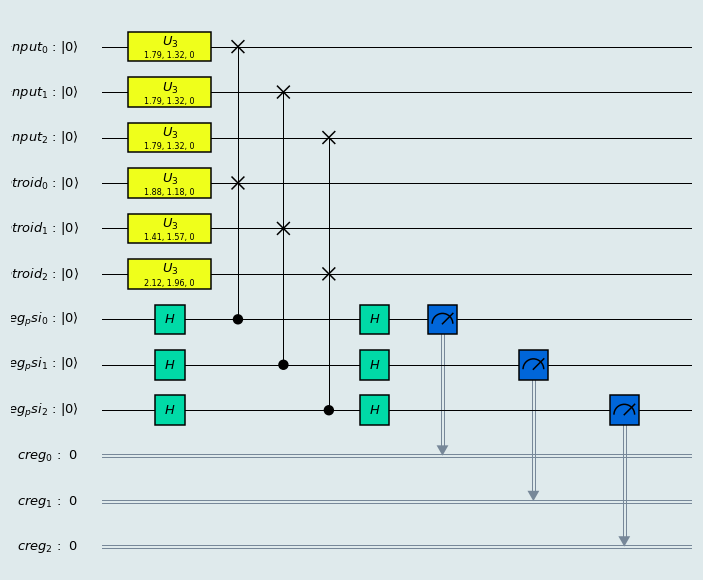

In [59]:
# Change the background color in mpl

style = {'backgroundcolor': '#DFEAEC', 'showindex': False, 'displaycolor': {
        'id': 'red', 'meas':'#0066DA', 'h': '#00DAA7', 'u3': '#EFFF1B'} }

qc.draw(output='mpl', style=style, reverse_bits= False)
